# Training Iris data  using Naive Bayes


In [2]:
import pandas as pd              # PANDAS IS A DATAframe lib
import matplotlib.pyplot as plt  # matplotlib.pyplot plots the data
import numpy as np               # numpy supports N-dim object support 

# do plotting inline instead of separate window
%matplotlib inline

## Load and review data

In [18]:
names=['Sepal length','Sepal width', 'Petal length', 'Petal width', 'Flower class']
data_frame= pd.read_csv("iris_data.txt", names=names)      #Load iris data

In [19]:
data_frame.shape

(150, 5)

In [20]:
data_frame.head(5)

,Sepal length,Sepal width,Petal length,Petal width,Flower class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## checking for Null values

In [21]:
data_frame.isnull().values.any()

False

## check for the correraaltion of data using matplotlib corr fun

In [22]:
data_frame.corr()

,Sepal length,Sepal width,Petal length,Petal width,Flower class
Sepal length,1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length,0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width,0.817954,-0.356544,0.962757,1.000000,0.956464
Flower class,0.782561,-0.419446,0.949043,0.956464,1.000000


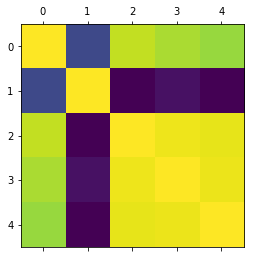

In [23]:
plt.matshow(data_frame.corr())

## plotting Histograms

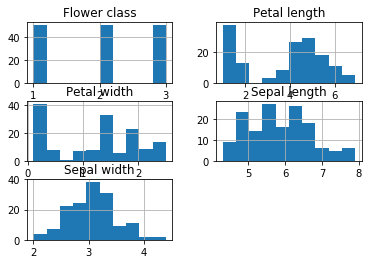

In [25]:
data_frame.hist()

plt.show()

## Plotting the scatter matrix

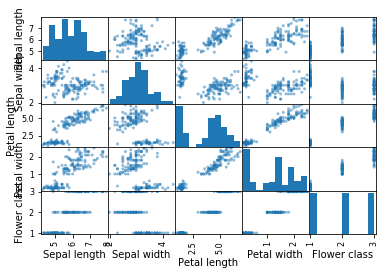

In [27]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_frame)
plt.show()

## Box and Whisker plots

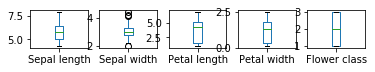

In [33]:
data_frame.plot(kind="box", subplots=True, layout=(5,5),sharex=False, sharey=False)
plt.show()

## splitting the data into train and test set

In [37]:
from sklearn.cross_validation import train_test_split
feature_col_names=['Sepal length','Sepal width', 'Petal length', 'Petal width']
predicted_class_names=['Flower class']

X= data_frame[feature_col_names].values    #features
y= data_frame[predicted_class_names].values # labels
split_test_size= 0.30

X_train, X_test, y_train,y_test= train_test_split(X, y, test_size=split_test_size, random_state=42)

In [39]:
X_train.shape

(105, 4)

In [40]:
X_test.shape

(45, 4)

In [51]:
print(X_train[:5,:])

[[5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]]


## finding Missing  values in the data 

In [56]:

print("# rows in dataset", format(len(data_frame)))
print("# rows missing Sepal length: ", format(len(data_frame.loc[data_frame['Sepal length']==0])))
print("# rows missing Sepal width : ", format(len(data_frame.loc[data_frame['Sepal width'] ==0 ])))
print("# rows missing Petal length : ", format(len(data_frame.loc[data_frame['Petal length'] ==0 ])))
print("# rows missing Sepal width : ", format(len(data_frame.loc[data_frame['Petal width'] ==0 ])))

# rows in dataset 150
# rows missing Sepal length:  0
# rows missing Sepal width :  0
# rows missing Petal length :  0
# rows missing Sepal width :  0


## Training data with Gaussian Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB

# create a new GNB object and train it with data
gnb_model= GaussianNB()
gnb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

In [63]:
gnb_model

GaussianNB(priors=None)

## Performance on training data 

In [78]:
# predict values using the training data
gnb_predict_train=gnb_model.predict(X_train)

# import the performnace metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4%}".format (metrics.accuracy_score(y_train,gnb_predict_train)))

Accuracy: 94.2857%


## performance on test data

In [79]:
gnb_predict_test= gnb_model.predict(X_test)

print("Accuracy: {0:0.4f}".format(metrics.accuracy_score(y_test,gnb_predict_test)))

Accuracy: 0.9778


In [84]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, gnb_predict_test)))

Confusion Matrix
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [86]:
print("Classification report")
print(metrics.classification_report(y_test,gnb_predict_test))

Classification report
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        19
          2       1.00      0.92      0.96        13
          3       0.93      1.00      0.96        13

avg / total       0.98      0.98      0.98        45



## Training data with Logistic regression

In [101]:
from sklearn.linear_model import LogisticRegression

# create a new LR object and train it with data
lr_model= LogisticRegression(C=10)
lr_model.fit(X_train, y_train.ravel())

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Performance on training data

In [102]:
lr_model_train=lr_model.predict(X_train)

from sklearn import metrics

print("Accuracy {0:.4f}".format(metrics.accuracy_score(y_train,lr_model_train)))

Accuracy 0.9619


## performance on test data

In [106]:
lr_model_test= lr_model.predict(X_test)

from sklearn import metrics

print("Accuracy {0:.4f}".format(metrics.accuracy_score(y_test,lr_model_test)))

print("Confusion Matrix")
print(metrics.confusion_matrix(y_test,lr_model_test))

print("Classification report")
print(metrics.classification_report(y_test,lr_model_test))



Accuracy 1.0000
Confusion Matrix
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification report
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        19
          2       1.00      1.00      1.00        13
          3       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        45

